In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset
import os
from source.data_processing.image_reading import read_image
from source.data_processing.transformations import sample_random_affine_matrix
from typing import Tuple, List
from torchvision import transforms
from kornia.geometry.transform import warp_affine
from matplotlib import pyplot as plt
from source.visualization.image_visualization import plot_images_with_matches
from source.data_processing.keypoints import generate_image_grid_coordinates
from source.data_processing.transformations import *
from source.visualization.image_visualization import plot_image_with_crop
from source.data_processing.cropping import sample_crop_coordinates, crop_image

In [2]:
images_directory = "data/cyto_downscaled_3344_3904/"
image_names = os.listdir(images_directory)
image_1, image_2 = read_image(
    os.path.join(images_directory, image_names[0])
), read_image(os.path.join(images_directory, image_names[1]))
image_1 = transforms.ToTensor()(image_1)
image_2 = transforms.ToTensor()(image_2)
image_size = image_1.shape[-2:]

In [3]:
torch.manual_seed(1)

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


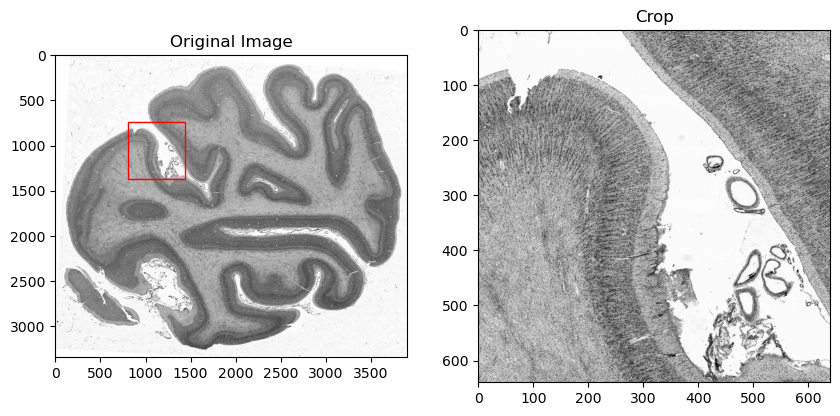

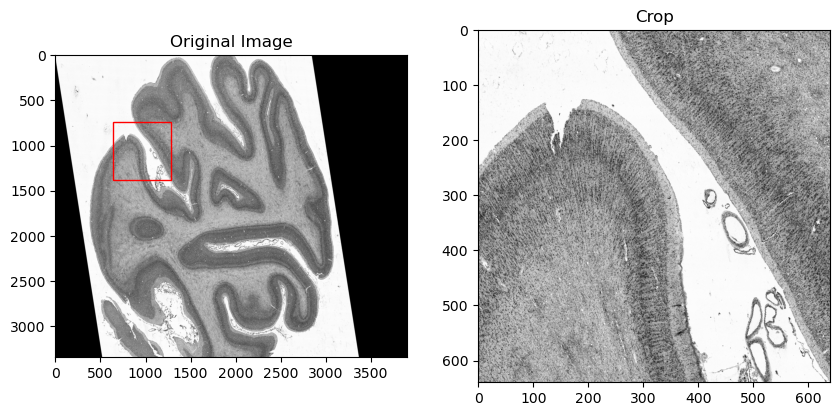

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


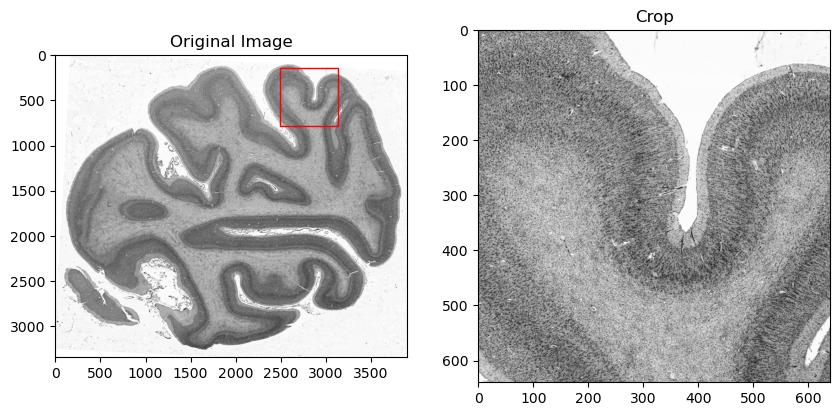

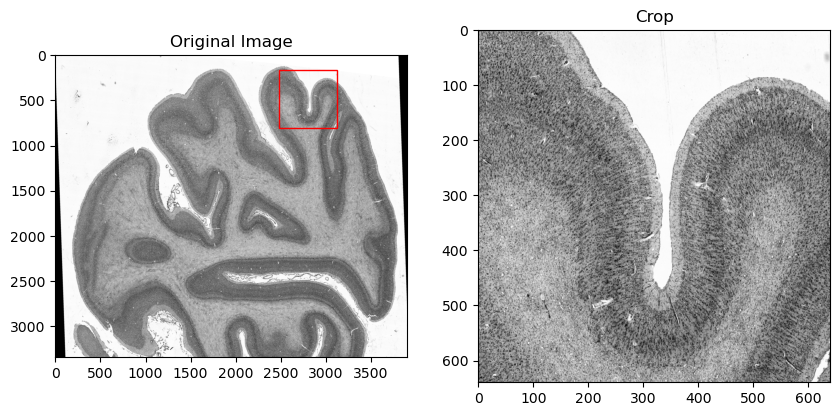

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


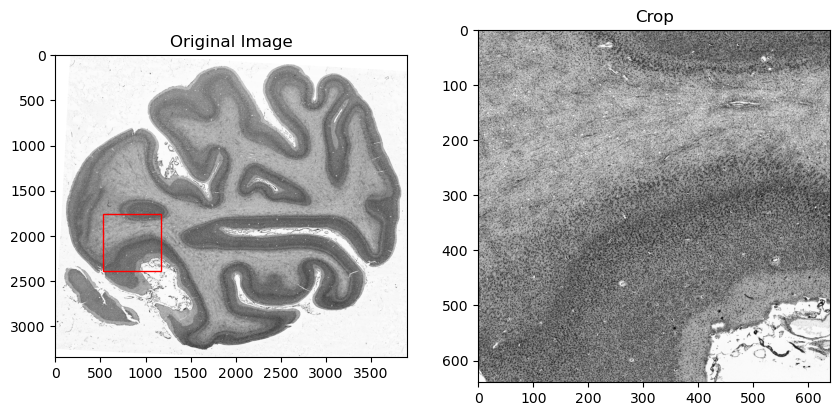

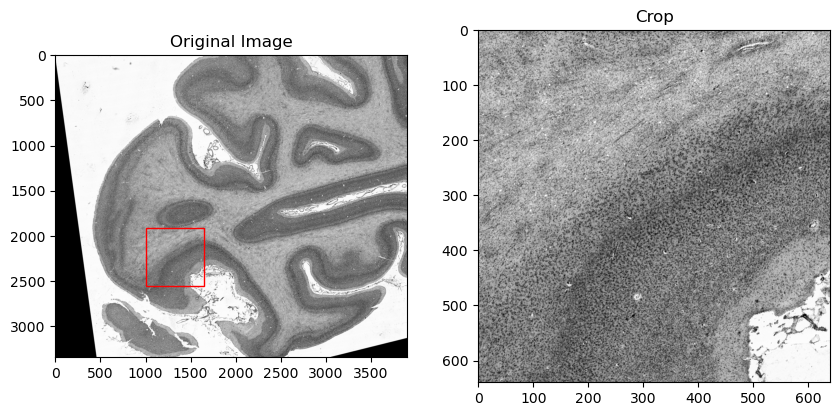

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


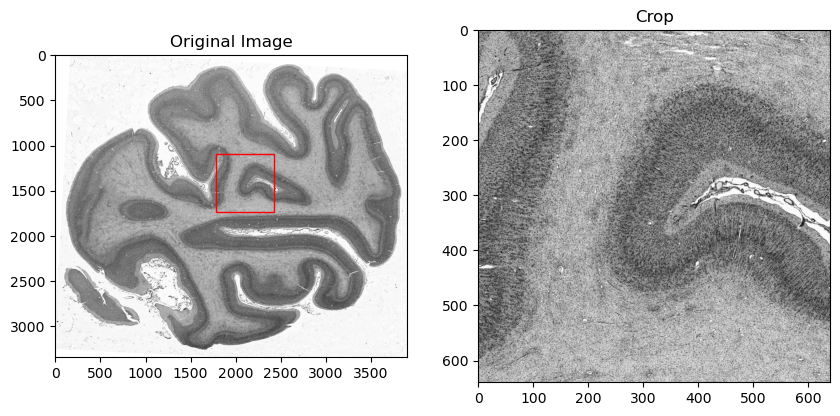

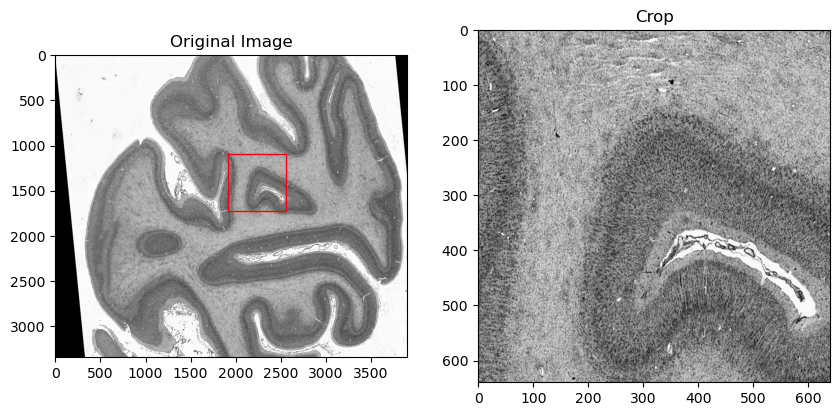

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


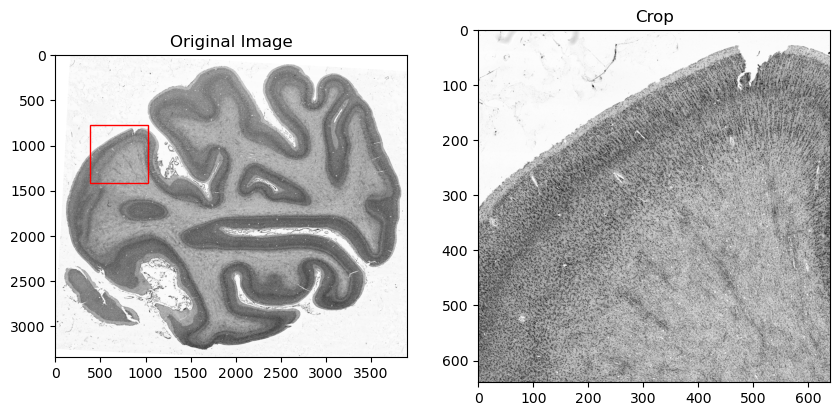

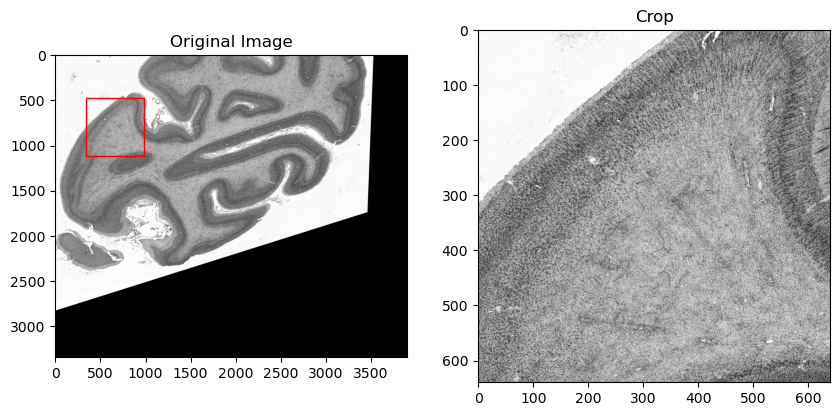

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


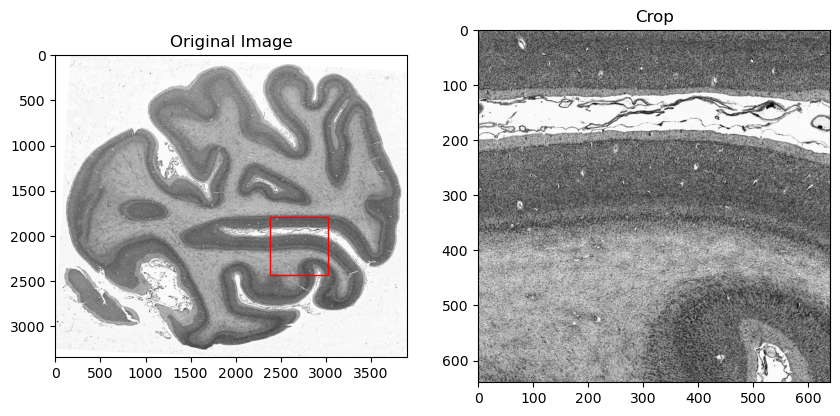

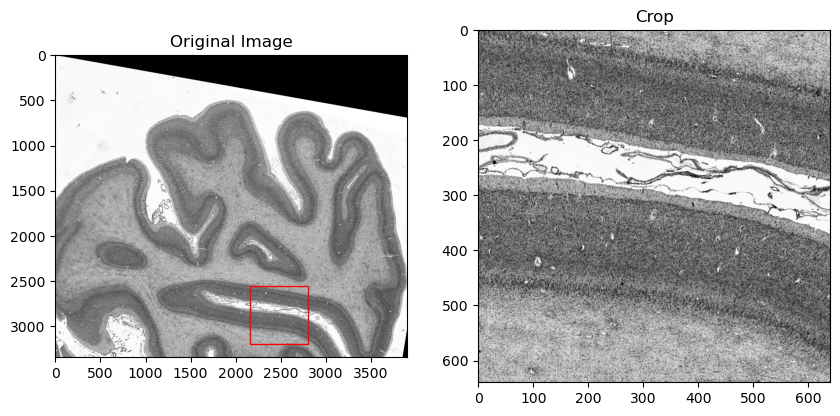

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


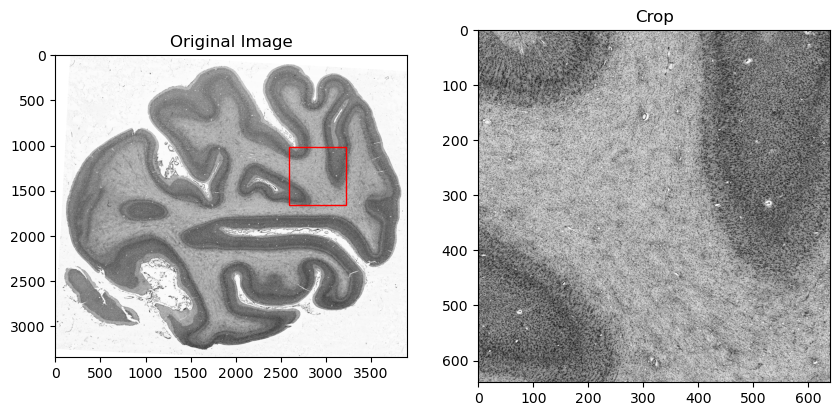

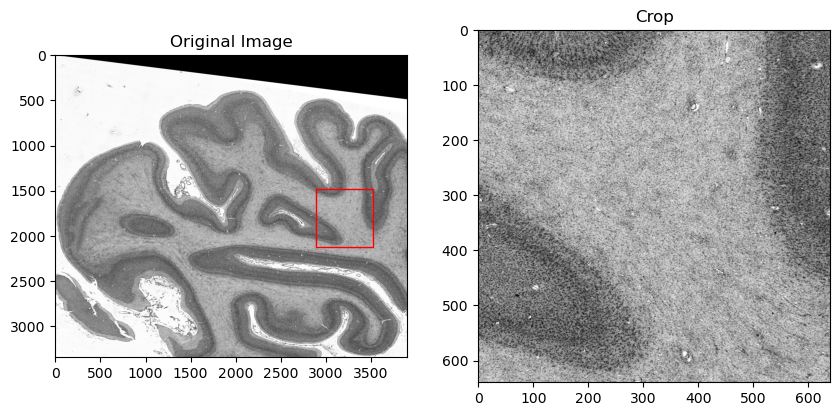

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


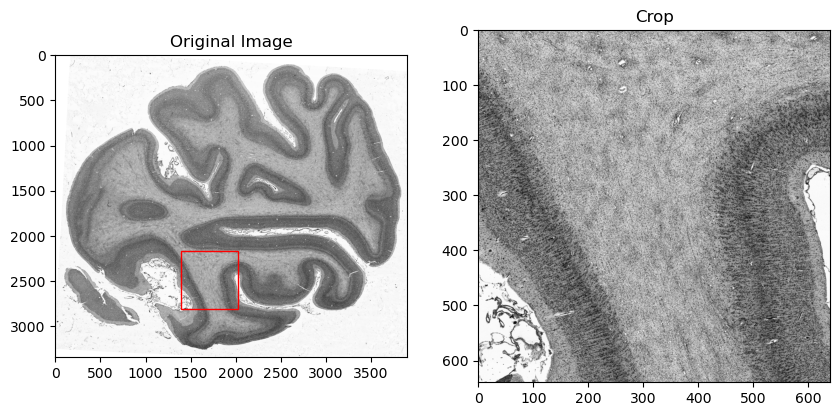

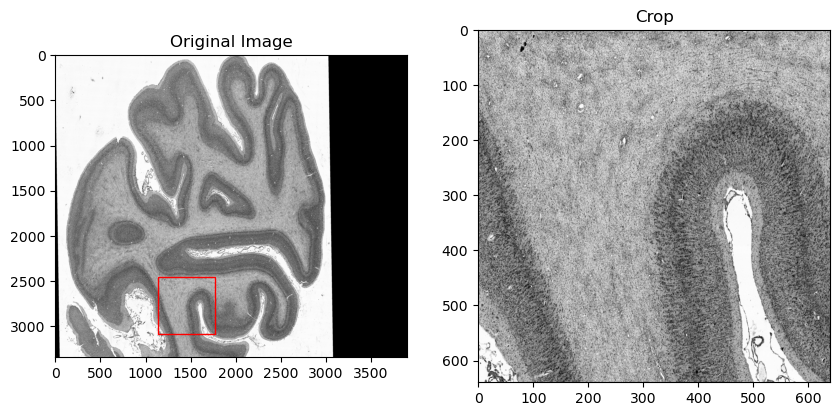

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


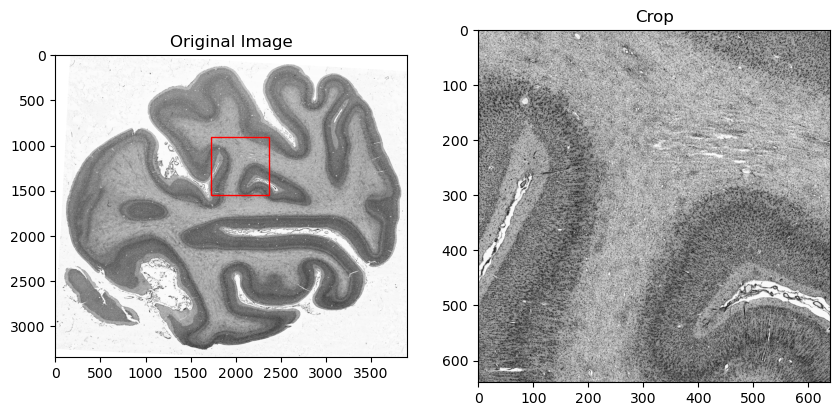

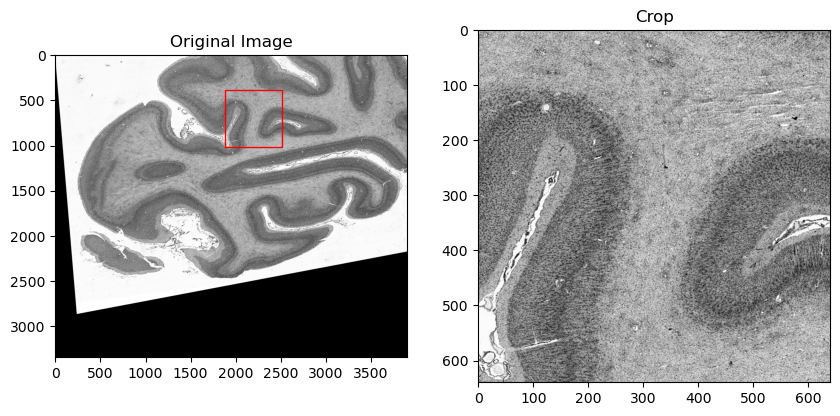

torch.Size([1, 640, 640]) torch.Size([1, 640, 640])


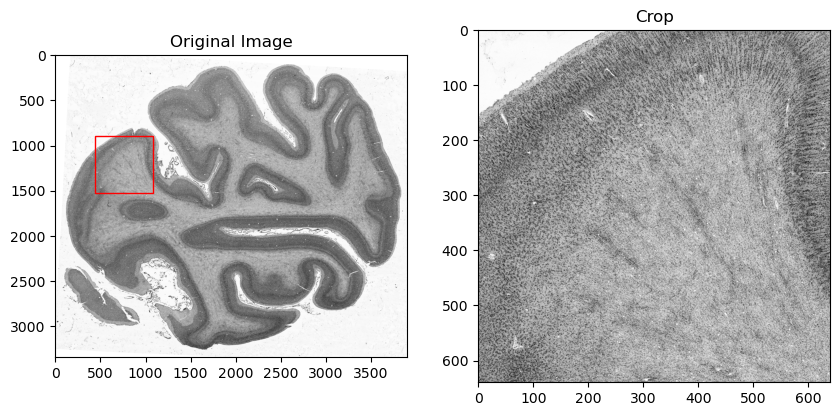

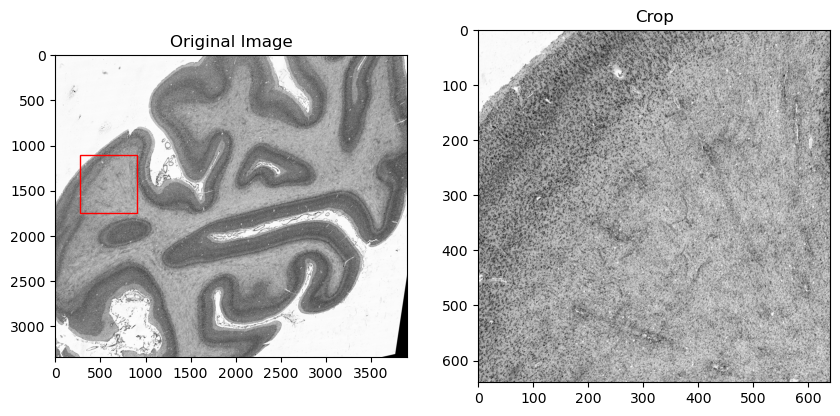

In [4]:
crop_size = 640
max_translation_shift = 100


for _ in range(10):
    transformation_matrix = sample_random_affine_matrix(range_limit=0.3)
    image_2_transformed = warp_affine(
        src=image_2.unsqueeze(0),
        M=transformation_matrix,
        dsize=image_size,
        mode="nearest",
    )[0]
    grid_coordinates = generate_image_grid_coordinates(image_size)
    image_coordinate_mapping = transform_grid_coordinates(
        grid_coordinates, transformation_matrix[0]
    )
    crop_position_image_1, crop_position_image_2 = sample_crop_coordinates(
        coordinate_mapping=image_coordinate_mapping,
        crop_size=crop_size,
        max_translation_shift=max_translation_shift,
    )

    image_1_crop = crop_image(
        image=image_1, crop_position=crop_position_image_1, crop_size=crop_size
    )
    image_2_crop = crop_image(
        image=image_2_transformed,
        crop_position=crop_position_image_2,
        crop_size=crop_size,
    )

    print(image_1_crop.shape, image_2_crop.shape)
    plot_image_with_crop(
        original_image=image_1,
        crop_image=image_1_crop,
        crop_position=crop_position_image_1,
    )
    plot_image_with_crop(
        original_image=image_2_transformed,
        crop_image=image_2_crop,
        crop_position=crop_position_image_2,
    )